# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Load data

In [2]:
#load data from spreadsheet into array
data_file_in = open("all_samples_data.csv", "r")
#ndmin to force 2d array even if there is one row
all_data = np.array(np.loadtxt(data_file_in, delimiter=",", skiprows=1), ndmin=2)
data_file_in.close()

#mask to allow only points with nonzero values of xrr thickness
mask = np.array(all_data[0:,1], dtype=bool)

# simple linear regression
since an x/y linear regression can be solved analytically with no trouble, it's easier for me to just do it here instead of figuring out all the calls to `scipy.optimize`

In [3]:
def simpleLinReg(x, y):
    x_mean = np.average(x)
    y_mean = np.average(y)

    slope = np.sum( (x - x_mean)*(y - y_mean) ) / np.sum( (x - x_mean)**2 )
    intercept = y_mean - slope*x_mean

    return slope, intercept

# Figure parameters

In [4]:
ms = 15 #marker size
marker_edge = 2
title_font = {"fontsize": 36}
legend_font_size = 20
axes_font = {"fontsize": 30}
tick_label_size = 20
fit_line_size = 1.5
grid_width = 0.4

figure_size = (7, 6)

# Plot line intensities vs. xrr and SE thickness

In [5]:
def xrfVsXrrAndSE(id):
#0 for Ga ka
#1 for Ga kb
#2 for Ga L
#3 for Si ka
#4 for P Ka

    f, ax = plt.subplots(figsize=figure_size, layout="constrained")
    
    titles = ["Ga K\u03b1 intensity",
          "Ga K\u03b2 intensity",
          "Ga L group intensity",
          "Si K\u03b1 intensity",
          "P K\u03b1 intensity"]

    #xrr data
    ax.plot(all_data[0:, 1][mask], all_data[0:, 5+id][mask],# xerr=all_data[0:, 2][mask], yerr = all_data[0:, 10+id][mask],
            linestyle="None", marker="+", mew=marker_edge, markersize=ms, label = "XRR")

    #SE data
    ax.plot(all_data[0:, 3], all_data[0:, 5+id],# xerr=all_data[0:, 4], yerr = all_data[0:, 10+id],
            linestyle="None", marker="x", mew=marker_edge, markersize=ms, label = "SE")

    #fit based on ellipsometry data
    fit_ga_ka = simpleLinReg(all_data[0:,3], all_data[0:,5+id])

    if id!=3:
        ax.plot(np.linspace(40, 550), np.linspace(40, 550)*fit_ga_ka[0] + fit_ga_ka[1], ":",
                label="Linear fit", linewidth=fit_line_size)

    ax.grid(visible=True, linewidth=grid_width)
    ax.set_xlabel("Thickness, nm", fontdict=axes_font)
    ax.set_ylabel(titles[id], fontdict=axes_font)
    #ax.set_title(titles[id], fontdict=title_font)
    ax.legend(fontsize=legend_font_size)
    ax.tick_params(axis="both", which="major", labelsize=tick_label_size)
    ax.tick_params(axis="y", rotation=45)
    ax.ticklabel_format(axis="y", scilimits=(0,3))
    ax.yaxis.get_offset_text().set_fontsize(tick_label_size)

    plt.savefig(titles[id]+"_xrr_se_thickness_graph.png")

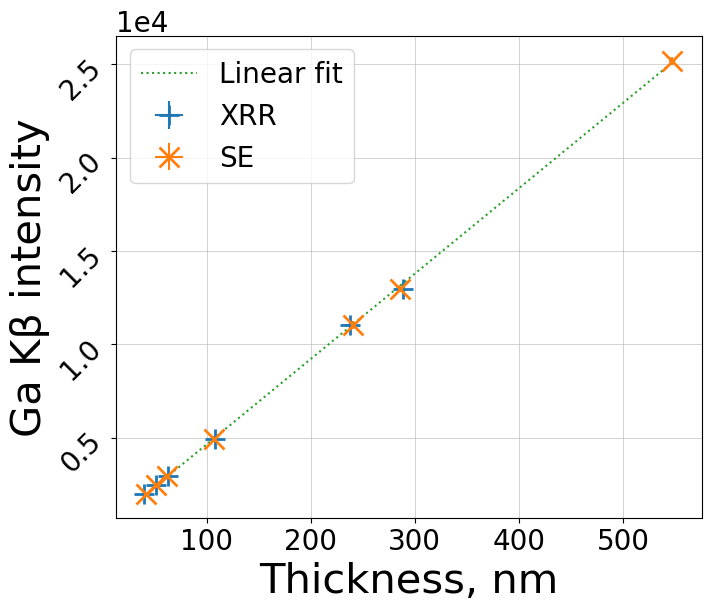

In [6]:
xrfVsXrrAndSE(1)

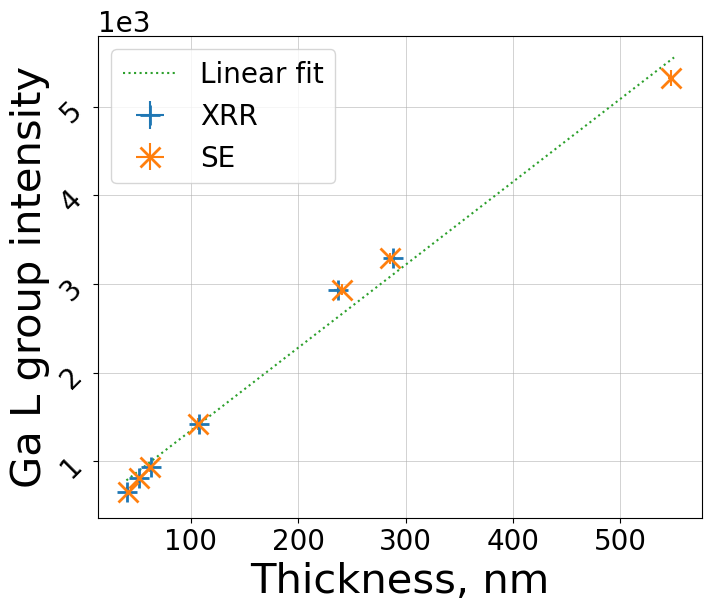

In [7]:
xrfVsXrrAndSE(2)

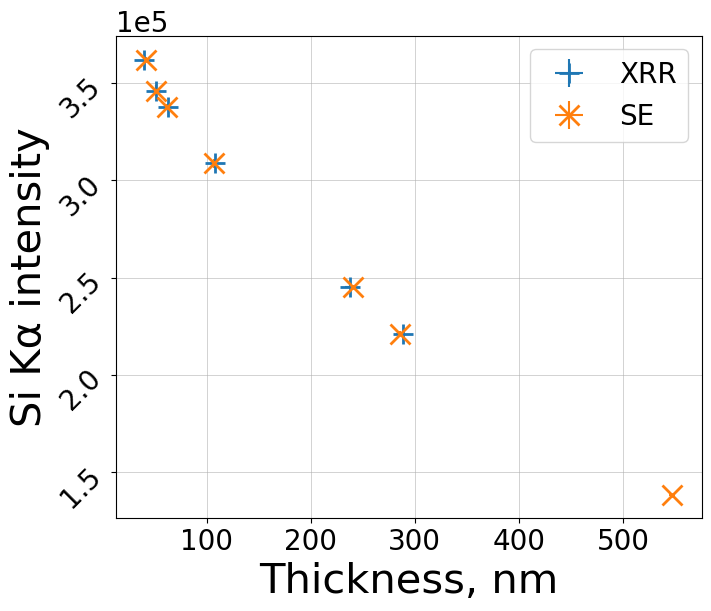

In [8]:
xrfVsXrrAndSE(3)

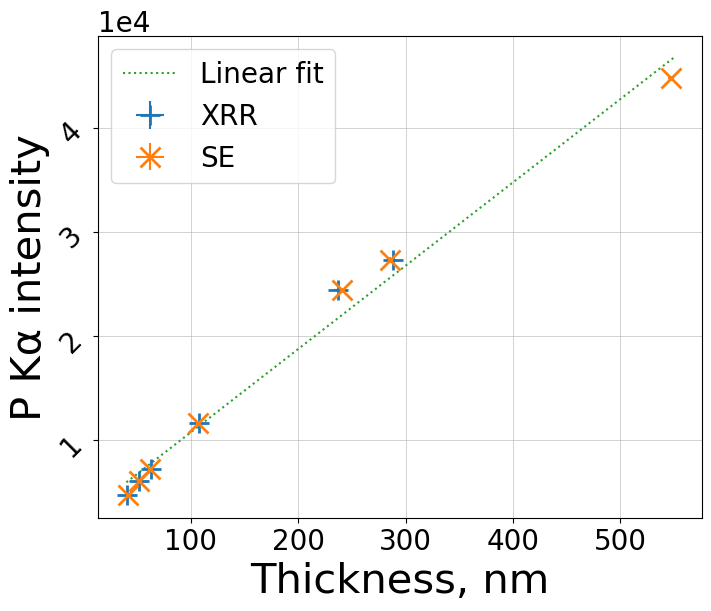

In [9]:
xrfVsXrrAndSE(4)

In [10]:
ms = 15 #marker size
marker_edge = 3
title_font = {"fontsize": 36}
legend_font_size = 20
axes_font = {"fontsize": 30}
tick_label_size = 20
fit_line_size = 2
grid_width = 0.4

figure_size = (14, 10)

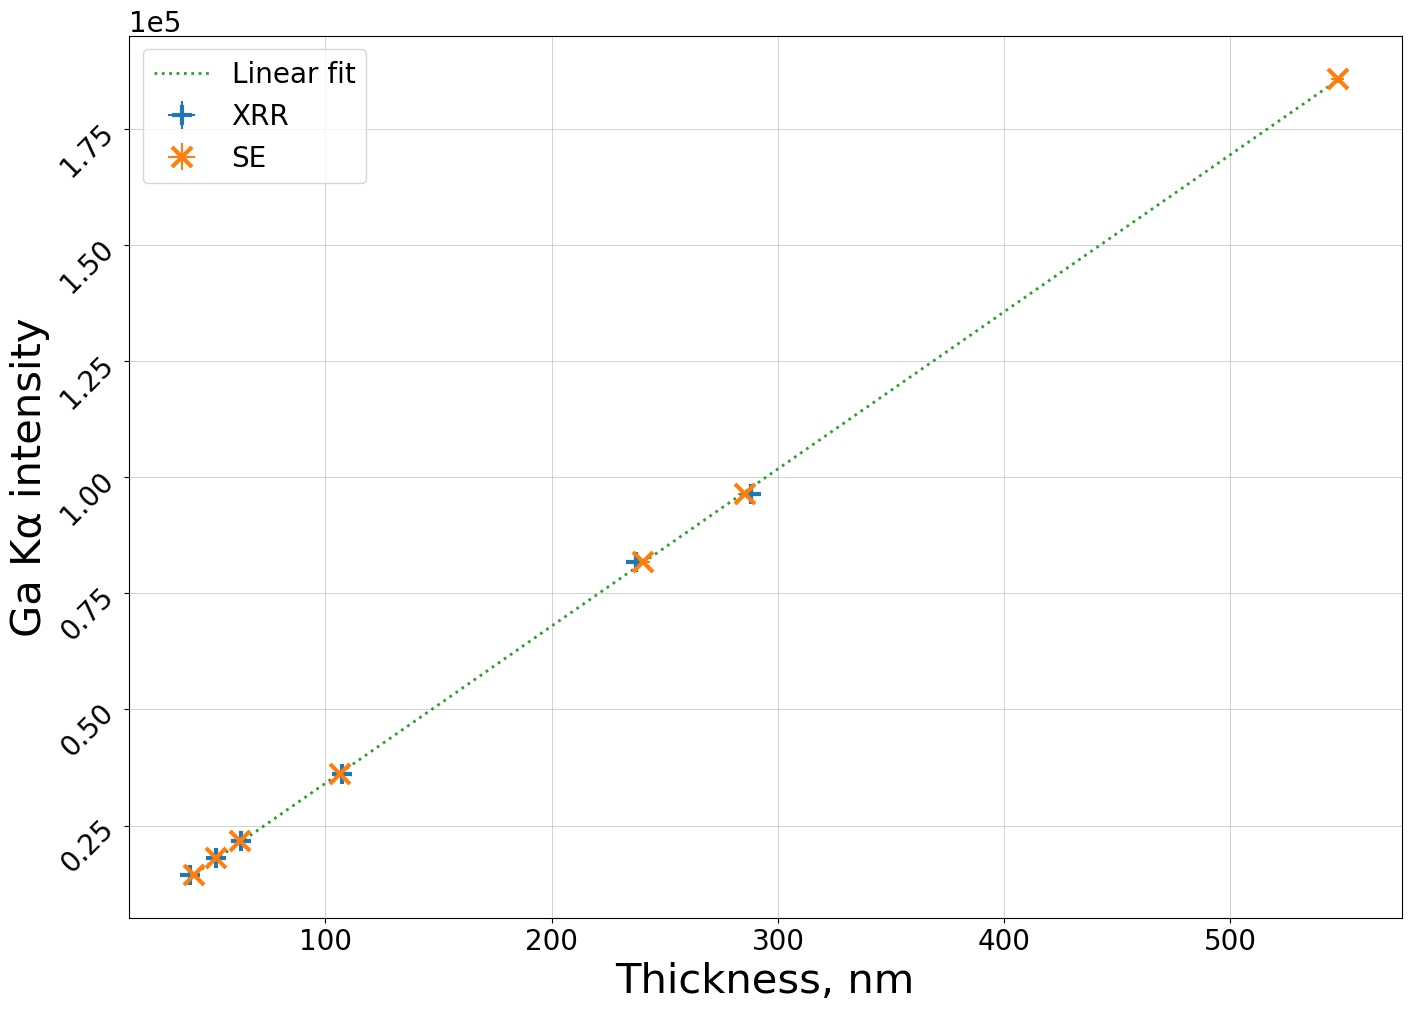

In [11]:
xrfVsXrrAndSE(0)

In [12]:
ms = 15 #marker size
marker_edge = 2
title_font = {"fontsize": 36}
legend_font_size = 20
axes_font = {"fontsize": 30}
tick_label_size = 20
fit_line_size = 1.5
grid_width = 0.4

figure_size = (7, 6)

# Plot line intensities vs. xrr thickness

In [13]:
def xrfVsXrr(id):
#0 for Ga ka
#1 for Ga kb
#2 for Ga L
#3 for Si ka
#4 for P Ka

    f, ax = plt.subplots(figsize=figure_size, layout="constrained")
    
    titles = ["Ga K\u03b1 intensity",
          "Ga K\u03b2 intensity",
          "Ga L group intensity",
          "Si K\u03b1 intensity",
          "P K\u03b1 intensity"]
    
    ax.errorbar(all_data[0:, 1][mask], all_data[0:, 5+id][mask], xerr=all_data[0:, 2][mask], yerr = all_data[0:, 10+id][mask],
            linestyle="None", marker=".", markersize=ms, label = titles[id])

    fit_ga_ka = simpleLinReg(all_data[0:,1][mask], all_data[0:,5+id][mask])

    if id!=3:
        ax.plot(np.linspace(40, 290), np.linspace(40, 290)*fit_ga_ka[0] + fit_ga_ka[1], ":",
            label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_ga_ka), linewidth=fit_line_size)

    ax.grid(visible=True, linewidth=grid_width)
    ax.set_xlabel("Thickness, nm, via XRR", fontdict=axes_font)
    ax.set_ylabel("XRF intensity", fontdict=axes_font)
    #ax.set_title(titles[id], fontdict=title_font)
    ax.legend(fontsize=legend_font_size)
    ax.tick_params(axis="both", which="major", labelsize=tick_label_size)
    ax.tick_params(axis="y", rotation=45)
    ax.ticklabel_format(axis="y", scilimits=(0,3))
    ax.yaxis.get_offset_text().set_fontsize(tick_label_size)

    plt.savefig(titles[id]+"_xrr_thickness_graph.png")

# plot line intensities vs. ellipsometry thickness

In [14]:
def xrfVsEll(id):
    
#0 for Ga ka
#1 for Ga kb
#2 for Ga L
#3 for Si ka
#4 for P Ka

    f, ax = plt.subplots(figsize=figure_size, layout="constrained")
                      
    titles = ["Ga K\u03b1 intensity",
          "Ga K\u03b2 intensity",
          "Ga L group intensity",
          "Si K\u03b1 intensity",
          "P K\u03b1 intensity"]
    
    ax.errorbar(all_data[0:, 3], all_data[0:, 5+id], xerr=all_data[0:, 4], yerr = all_data[0:, 10+id],
            linestyle="None", marker=".", markersize=ms, label = titles[id])

    fit_ga_ka = simpleLinReg(all_data[0:,3], all_data[0:,5+id])

    if id!=3:
        ax.plot(np.linspace(40, 550), np.linspace(40, 550)*fit_ga_ka[0] + fit_ga_ka[1], ":",
                label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_ga_ka), linewidth=fit_line_size)

    ax.grid(visible=True, linewidth=grid_width)
    ax.set_xlabel("Thickness, nm, via SE", fontdict=axes_font)
    ax.set_ylabel("XRF intensity", fontdict=axes_font)
    #ax.set_title(titles[id], fontdict=title_font)
    ax.legend(fontsize=legend_font_size)
    ax.tick_params(axis="both", which="major", labelsize=tick_label_size)
    ax.tick_params(axis="y", rotation=45)
    ax.ticklabel_format(axis="y", scilimits=(0,3))
    ax.yaxis.get_offset_text().set_fontsize(tick_label_size) #set font size of "1eX" scientific notation label

    plt.savefig(titles[id]+"_ell_thickness_graph.png")

# Plot XRR results vs ellipsometry